In [65]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import tensorflow as tf 
import keras 
from keras import layers

In [ ]:
df = pd.read_csv("content/spam.csv",encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
df = df.rename(columns={'v1':'Label','v2':'Message'})
df['label_enc'] = df['Label'].map({'ham':0,'spam':1})
df.head()

,Label,Message,label_enc
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


<Axes: xlabel='Label', ylabel='count'>

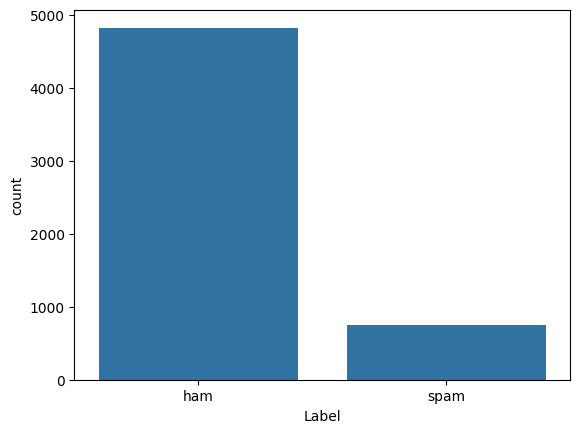

In [ ]:
sns.countplot(x=df['Label'])

In [ ]:
avg_words_len=round(sum([len(i.split()) for i in df['Message']])/len(df['Message'])) 
print(avg_words_len)


15


In [66]:
# Using explode and unique with Pandas
df_words = df['Message'].str.split().explode()
unique_words = df_words.unique()
total_word_length = len(unique_words)
print(total_word_length)


15585


In [70]:
df.isnull().sum()
df.duplicated().sum()

403

In [71]:
df = df.drop_duplicates()

In [72]:
df['Label'].value_counts()

Label
ham     4516
spam     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1a429bdef60>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'not spam'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.367'),
  Text(0.5533635081542612, -0.23192418555038377, '12.633')])

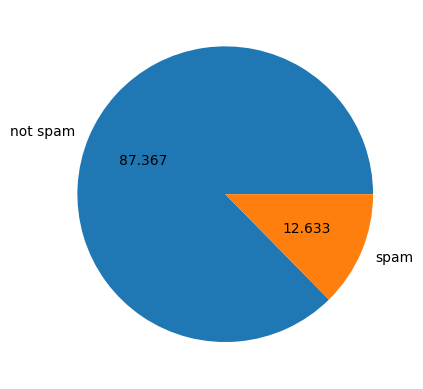

In [74]:
plt.pie(df['Label'].value_counts(),labels=['not spam','spam'],autopct='%0.3f')


In [101]:
df

,Label,Message,label_enc,num_chars,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",0,111,24,2
1,0,Ok lar... Joking wif u oni...,0,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2
3,0,U dun say so early hor... U c already then say...,0,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,1,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,0,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",0,57,15,2
5570,0,The guy did some bitching but I acted like i'd...,0,125,27,1


In [80]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [88]:
df = df.drop(columns=['num_characters'])


In [75]:
df['num_chars']= df['Message'].apply(len)
df.head()

,Label,Message,label_enc,num_chars
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


In [89]:
from nltk.tokenize import word_tokenize
df['Message'].apply(lambda x: nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: Message, Length: 5169, dtype: object

In [90]:
df['num_words']=df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))
df.sample(5)

,Label,Message,label_enc,num_chars,num_words
4543,ham,when you and derek done with class?,0,35,8
1866,ham,Or Ì_ go buy wif him then i meet Ì_ later can?,0,46,13
787,spam,Ever thought about living a good life with a p...,1,129,27
5470,ham,I thought slide is enough.,0,26,6
1411,ham,somewhere out there beneath the pale moon ligh...,0,144,28


In [91]:
df['num_sentences']=df['Message'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [109]:
df.sample(5)

,Label,Message,label_enc,num_chars,num_words,num_sentences
5313,0,My sister going to earn more than me da.,0,40,10,1
4464,0,\CHEERS FOR CALLIN BABE.SOZI CULDNT TALKBUT I ...,0,99,17,1
5569,0,"Pity, * was in mood for that. So...any other s...",0,57,15,2
3267,0,Which is why i never wanted to tell you any of...,0,111,28,2
2241,0,U buy newspapers already?,0,25,5,1


<Axes: xlabel='num_chars', ylabel='Count'>

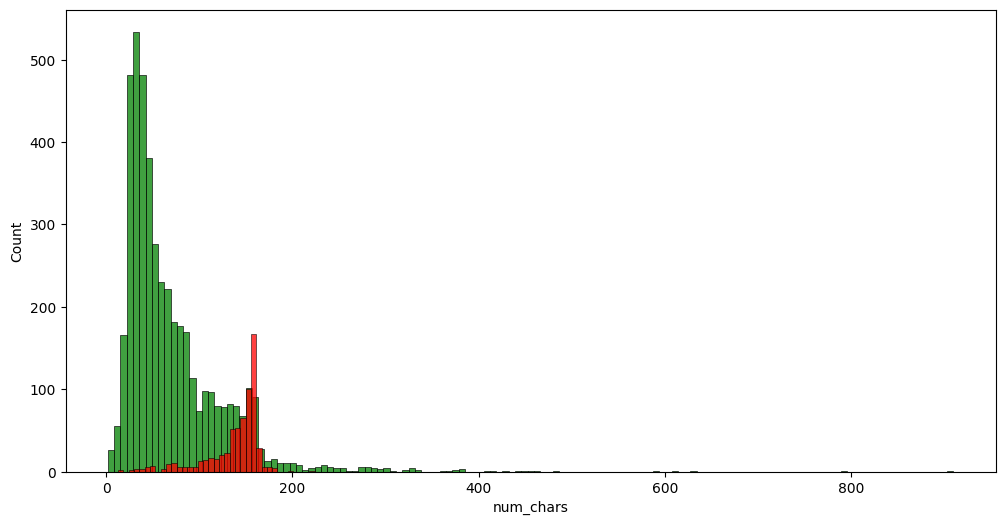

In [102]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['label_enc']==0]['num_chars'],color='green')
sns.histplot(df[df['label_enc']==1]['num_chars'],color = 'red')

<Axes: xlabel='num_words', ylabel='Count'>

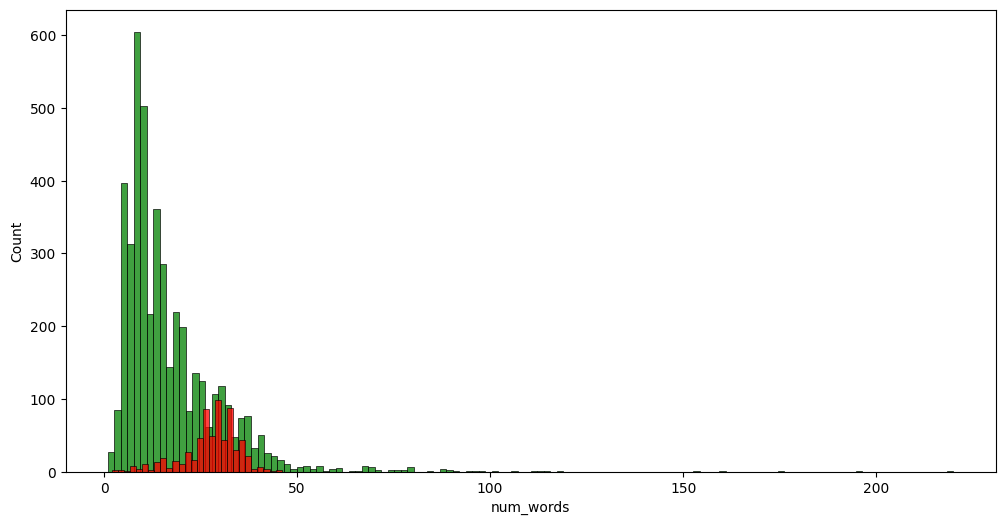

In [104]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['label_enc']==0]['num_words'],color='green')
sns.histplot(df[df['label_enc']==1]['num_words'],color='red')

In [113]:
import string

In [114]:
def text_transform(message):
    message=message.lower() #change to lowercase
    message=nltk.word_tokenize(message)
    y=[] 
    for i in message:
        if i.isalnum():
            y.append(i)

        y.clear()
    
    #for checking punctuations and stopwords
    for i in message:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    message=y[:]
    y.clear()
    
    #now stemming function
    for i in message:
        y.append(ps.stem(i))
    
    #return y  --> returns as list
    return " ".join(y)
# Removing stop words and punctuations
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')
len(stopwords.words('english')) 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


179

In [115]:
from nltk.stem.porter import PorterStemmer
ps =PorterStemmer()

In [117]:
df['transformed_msg']=df['Message'].apply(text_transform)

In [119]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

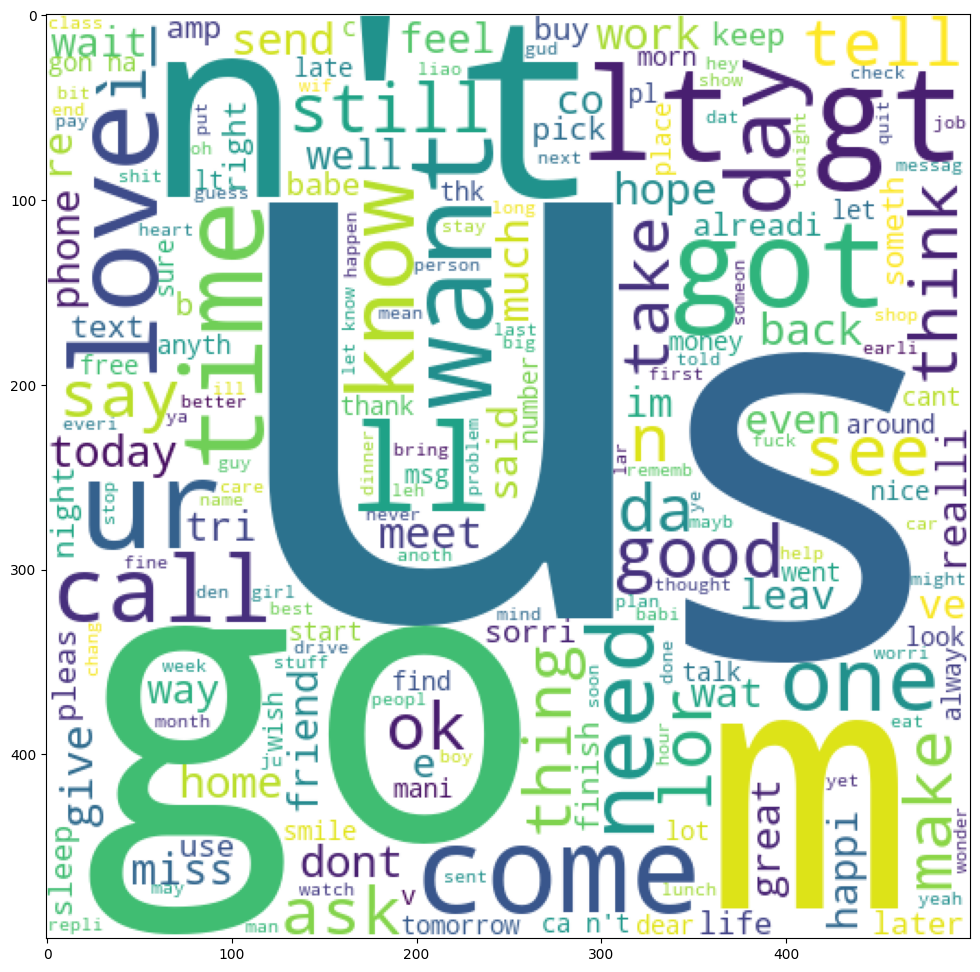

In [121]:
ham_wc=wc.generate(df[df['']==0]['transformed_msg'].str.cat(sep=""))
plt.figure(figsize=(18,12))
plt.imshow(ham_wc)label_enc

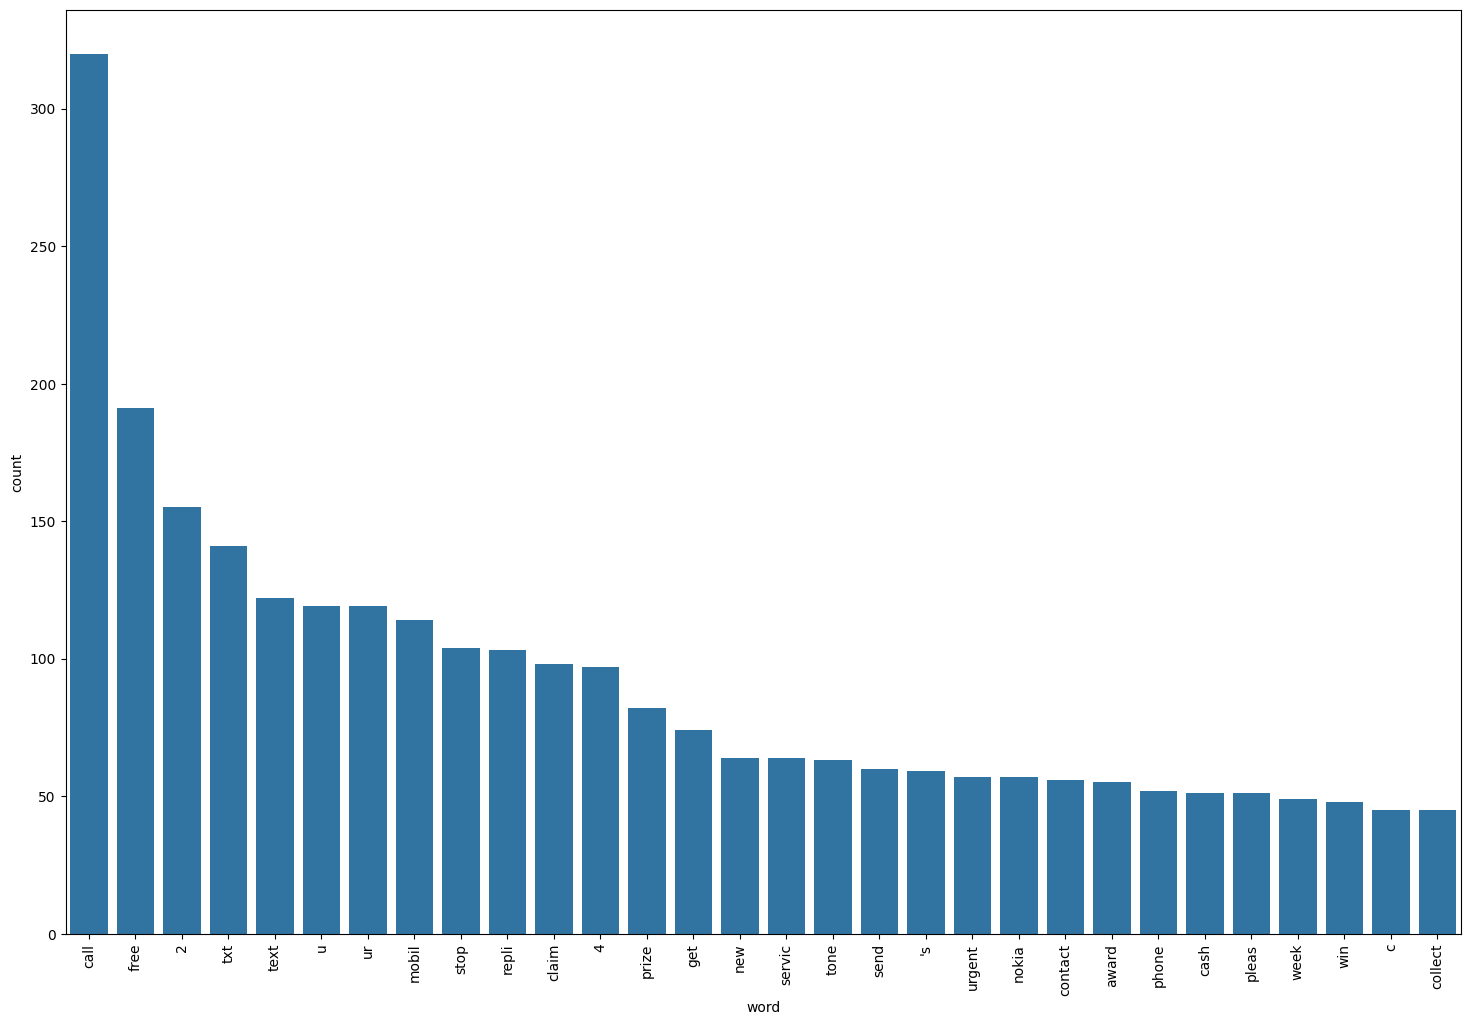

In [129]:
from collections import Counter
spam_corpus = []

# Extract words from spam messages and add to spam_corpus
for msg in df[df['label_enc'] == 1]['transformed_msg'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

# Count the frequency of each word in spam_corpus
word_counts = Counter(spam_corpus)
most_common_words = word_counts.most_common(30)

# Convert the most common words and their counts to a DataFrame
most_common_df = pd.DataFrame(most_common_words, columns=['word', 'count'])

# Plot the 30 most common words
plt.figure(figsize=(18, 12))
sns.barplot(x='word', y='count', data=most_common_df)
plt.xticks(rotation='vertical')
plt.show()

In [126]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf= TfidfVectorizer(max_features=3000) 
X=tfidf.fit_transform(df['transformed_msg']).toarray()
y=df['label_enc'].values


In [127]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [130]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()

In [131]:
gnb.fit(X_train,y_train)
y_pred1= gnb.predict(X_test)
print('Accuracy score of Gaussian NB is: ',accuracy_score(y_test,y_pred1))
print('Confusion Matrix of Guassian NB is: ',confusion_matrix(y_test,y_pred1))
print('Precision score of the Gaussian NB is',precision_score(y_test,y_pred1))

Accuracy score of Gaussian NB is:  0.8781431334622823
Confusion Matrix of Guassian NB is:  [[790 106]
 [ 20 118]]
Precision score of the Gaussian NB is 0.5267857142857143


In [132]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print('Accuracy score of Multinomial NB is: ',accuracy_score(y_test,y_pred2))
print('Confusion Matrix of Multinomial NB is: ',confusion_matrix(y_test,y_pred2))
print('Precision score of the Multinomial NB is',precision_score(y_test,y_pred2))

Accuracy score of Multinomial NB is:  0.9748549323017408
Confusion Matrix of Multinomial NB is:  [[896   0]
 [ 26 112]]
Precision score of the Multinomial NB is 1.0


In [134]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print('Accuracy score of Bernoulli NB is: ',accuracy_score(y_test,y_pred3))
print('Confusion Matrix of Bernoulli NB is: ',confusion_matrix(y_test,y_pred3))
print('Precision score of the Bernoulli NB is',precision_score(y_test,y_pred3))

Accuracy score of Bernoulli NB is:  0.988394584139265
Confusion Matrix of Bernoulli NB is:  [[896   0]
 [ 12 126]]
Precision score of the Bernoulli NB is 1.0
